<a href="https://colab.research.google.com/github/vaibhavbaswal95/ComputerVision/blob/master/Cars196.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.1.0 

In [0]:
#import statements
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import logging
import sys

In [3]:
tf.__version__

'2.1.0'

In [0]:
#importing tensorflow-dataset
import tensorflow_datasets as tfds

In [5]:
#listing all the available datasets
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'i_natura

In [0]:
#Loading dataset
ds_builder = tfds.load('cars196')

In [7]:
ds_builder['train']

<DatasetV1Adapter shapes: {bbox: (4,), image: (None, None, 3), label: ()}, types: {bbox: tf.float32, image: tf.uint8, label: tf.int64}>

In [8]:
type(ds_builder['train'])

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [9]:
#Another method for loading dataset
ds = tfds.image.Cars196()
#ds.download_and_prepare()
ds_ = ds.as_dataset()
type(ds_['train'])

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [0]:
# creating separate train & test datasets
train_dataset,test_dataset = ds_builder['train'],ds_builder['test']

In [11]:
train_dataset.element_spec

{'bbox': TensorSpec(shape=(4,), dtype=tf.float32, name=None),
 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None),
 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}

In [12]:
#lets look at image sizes & labels
for i in train_dataset.take(5):
  print(i['image'].shape,i['label'].numpy())

(361, 421, 3) 194
(474, 800, 3) 182
(452, 640, 3) 190
(373, 500, 3) 124
(1635, 2765, 3) 171


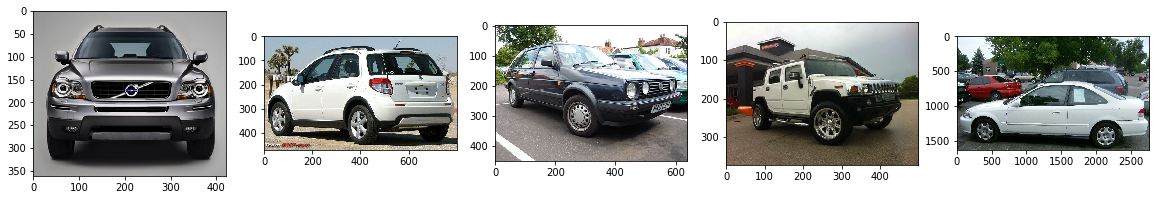

In [13]:
#lets see the ouput of few images
plt.figure(figsize=[20,20])
j=1
for i in train_dataset.take(5):
  plt.subplot(1,5,j)
  plt.imshow(i['image'])
  j+=1

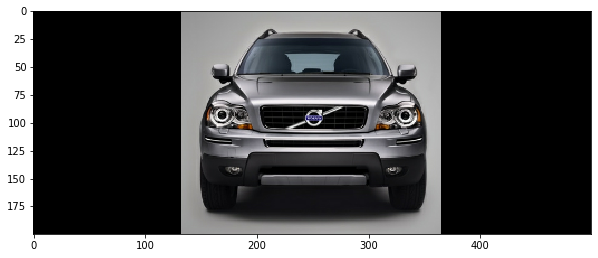

In [14]:
#we see images of different sizes, hence preprocessing is required
plt.figure(figsize=[10,10])
plt.imshow(tf.image.resize_with_pad(image=next(iter(train_dataset))['image']/255,target_height=200,target_width=500))

In [0]:
#Configurations for image preprocessing
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [0]:
##using map function to apply prerpcessing fucntion to every element
#divided by 255 so as to ensure values from 1 to 255 scale in the images
train_dataset_ = train_dataset.map(lambda x : {'image': tf.image.resize_with_pad(x['image']/255,target_height=IMG_HEIGHT,target_width=IMG_WIDTH,),'label': x['label']})

In [17]:
train_dataset.element_spec

{'bbox': TensorSpec(shape=(4,), dtype=tf.float32, name=None),
 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None),
 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}

In [18]:
train_dataset_.element_spec

{'image': TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None),
 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}

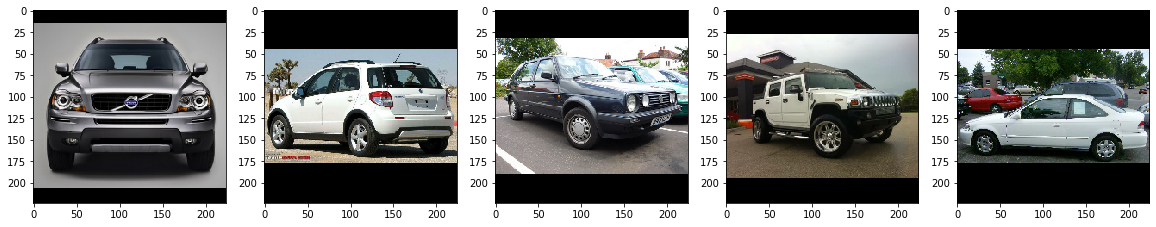

In [19]:
#lets see the ouput of few images
plt.figure(figsize=[20,20])
j=1
for i in train_dataset_.take(5):
  plt.subplot(1,5,j)
  plt.imshow(i['image'])
  j+=1

In [20]:
train_dataset_.element_spec['image'].shape

TensorShape([224, 224, 3])

In [0]:
inputs = keras.Input(shape=[224, 224, 3], name = 'image')

In [107]:
inputs.shape

TensorShape([None, 224, 224, 3])

In [108]:
inputs.dtype

tf.float32

In [0]:
x = keras.layers.Dense(64, activation='relu')(inputs)
x = keras.layers.Dense(16, activation='relu')(x)

In [0]:
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(196, activation='softmax')(x) 

In [0]:
model = keras.Model(inputs=inputs, outputs=outputs, name='test_model')

In [112]:
model.summary()

Model: "test_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 224, 224, 3)]     0         
_________________________________________________________________
dense_16 (Dense)             (None, 224, 224, 64)      256       
_________________________________________________________________
dense_17 (Dense)             (None, 224, 224, 16)      1040      
_________________________________________________________________
flatten_6 (Flatten)          (None, 802816)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 196)               157352132 
Total params: 157,353,428
Trainable params: 157,353,428
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [0]:
train_batch = train_dataset_.batch(32,drop_remainder=True)

In [132]:
train_batch.element_spec

{'image': TensorSpec(shape=(32, 224, 224, 3), dtype=tf.float32, name=None),
 'label': TensorSpec(shape=(32,), dtype=tf.int64, name=None)}

In [151]:
next(iter(train_batch))['image'].shape

<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


 

In [142]:
model.fit(train_dataset_)

ValueError: ignored

In [74]:
import gc
gc.enable()
gc.collect()

15162

In [0]:
#Model creation
model = keras.Sequential()

In [0]:
model.add(keras.layers.)

In [0]:
#Adding layers ot the model
model.add(keras.layers.Dense(64,activation='relu'))

In [0]:
#Adding more layers
model.add(keras.layers.Dense(32,activation='relu'))

In [0]:
model.add(keras.layers.Dense(1))

In [0]:
mnist_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,[3,3], activation='relu',
                         input_shape=(None, None, 1)),
  tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])

In [0]:
mnist_model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
          loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [0]:
#CONFIGURATIONS FOR MODEL TRAINING
BATCH_SIZE= 32
EPOCH = 1

In [0]:
mnist_model.fit(train_dataset)

ValueError: ignored